In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = '/content/drive/MyDrive/Almabetter/Projects/Churn Predictation/Churn Predicator.csv'

In [5]:
df = pd.read_csv(file_path)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.shape

(7043, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df2 = df.iloc[:,1:]
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [10]:
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',   value=0, inplace=True)

In [11]:
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,1,29.85,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,53.85,1,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,45,42.30,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,70.70,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
plt.figure(figsize=(10,8))
df_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

# Let us first understand gender, age range, partner, dependents status of customers.

Text(0.5, 1.0, 'Gender Distribution')

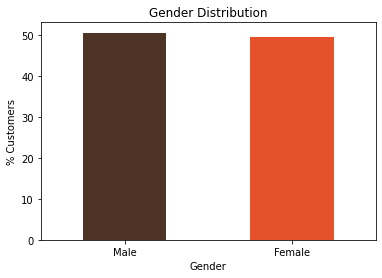

In [12]:
colors = ['#4D3425', '#E4512B']
ax = (df['gender'].value_counts()*100.0 / len(df)).plot(kind='bar', stacked= True, rot= 0, color= colors)

ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_title('Gender Distribution')



About half of the customers in our data set are male while other half are female

Text(0.5, 1.0, '% of Senior Citizens')

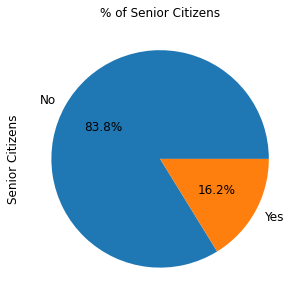

In [ ]:
ax = (df['SeniorCitizen'].value_counts()*100.0 / len(df)).plot.pie(autopct = '%.1f%%', labels = ['No', 'Yes'], figsize = (5,5), fontsize = 12)

ax.set_ylabel('Senior Citizens', fontsize = 12)
ax.set_title('% of Senior Citizens' , fontsize = 12)

So from above pie chart it shows that, around 16% of our customers who are senior citizens.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Unrecognized location 'centre'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # This is added back by InteractiveShellApp.init_path()


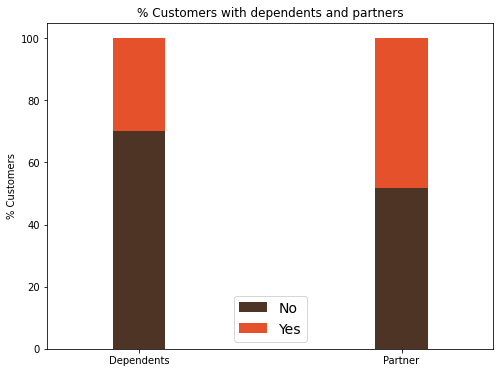

In [ ]:
df2 = pd.melt(df, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3= df2.groupby(['variable', 'value']).count().unstack()
df3 = df3*100/len(df)

colors = ['#4D3425', '#E4512B']
ax = df3.loc[:, 'customerID'].plot.bar(stacked=True, color=colors, figsize=(8,6),rot=0, width=0.2)

ax.set_ylabel('% Customers')
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners')
ax.legend(loc = 'centre', prop={'size':14})


## From above graph it shows that about 50% customers have partners & around 30% customers have dependents

# **Now lets explore churn rate by monthly charges & tenure**

## Monthly Charges vs Churn

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


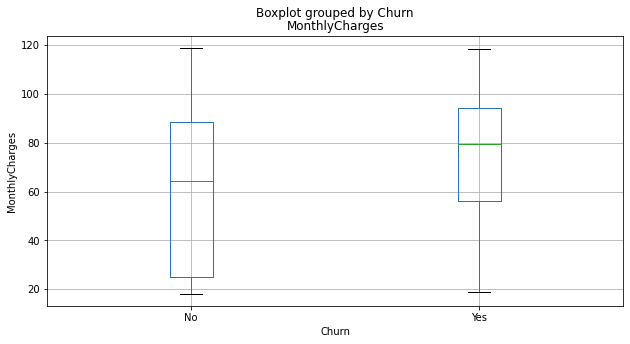

In [ ]:

fig = plt.figure(figsize=(10,5))
ax=fig.gca()
df.boxplot(column = 'MonthlyCharges', by='Churn', ax = ax)
ax.set_ylabel('MonthlyCharges')
plt.show()

## As we can see from above plot, the customers who have a month to month contract have a very high churn rate

## Tenure vs Churn

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


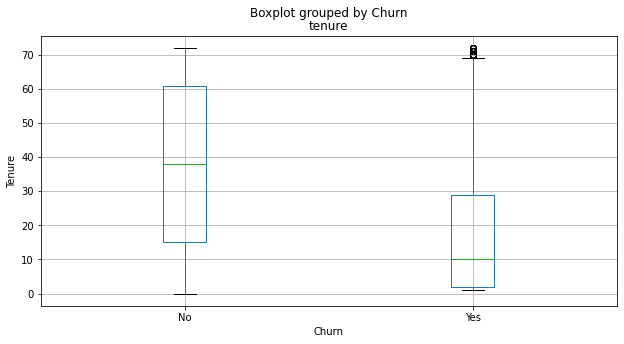

In [ ]:
fig = plt.figure(figsize=(10, 5))
ax = fig.gca()
df.boxplot(column = 'tenure', by = 'Churn', ax = ax)
ax.set_ylabel("Tenure")
plt.show()

## As we can see from above plot, the customers who do not churn, they tend to stay for a longer tenture with the telecom company.

In [ ]:
df['class'] = df['Churn'].apply(lambda x : 1 if x == "Yes" else 0)
# features will be saved as X and our target will be saved as y
X = df[['tenure','MonthlyCharges']].copy()
Y = df['class'].copy()

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,class
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,1


In [ ]:
df.shape

(7043, 22)

# Model Building

# 1. Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split( X,Y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(5634, 2)
(1409, 2)


In [ ]:
Y_train.value_counts()

0    4133
1    1501
Name: class, dtype: int64

In [ ]:
Y_test.value_counts()

0    1041
1     368
Name: class, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

In [ ]:
clf.coef_

array([[-0.05646728,  0.03315385]])

In [ ]:
clf.intercept_

array([-1.77408975])

# Evaluating the performance of the trained model

In [ ]:
# Get the predicted probabilities
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

In [ ]:
X_test

,tenure,MonthlyCharges
2200,19,58.20
4627,60,116.60
3225,13,71.95
2828,1,20.45
3768,55,77.75
...,...,...
2631,7,99.25
5333,13,88.35
6972,56,111.95
4598,18,56.25


In [ ]:
test_preds

array([[0.7145149 , 0.2854851 ],
       [0.78522641, 0.21477359],
       [0.53064776, 0.46935224],
       ...,
       [0.77288679, 0.22711321],
       [0.71618111, 0.28381889],
       [0.57740038, 0.42259962]])

In [ ]:
train_preds = clf.predict_proba(X_train)[:,1]
test_preds = clf.predict_proba(X_test)[:,1]

In [ ]:
test_preds

array([0.2854851 , 0.21477359, 0.46935224, ..., 0.22711321, 0.28381889,
       0.42259962])

In [ ]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [ ]:
train_class_preds

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [ ]:
train_accuracy = accuracy_score(train_class_preds,Y_train)
test_accuracy = accuracy_score(test_class_preds,Y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.7857649982250621
The accuracy on test data is  0.7735982966643009


In [ ]:
test_class_preds = clf.predict(X_test)
print(metrics.accuracy_score(Y_test, test_class_preds ))

0.7735982966643009


[[3745  388]
 [ 819  682]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

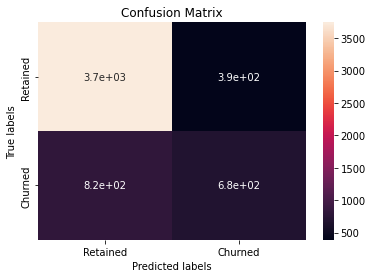

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[934 107]
 [212 156]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

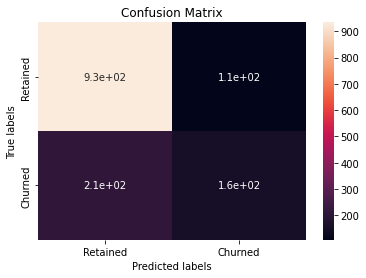

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# 2. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, Y_train, Y_test = train_test_split( X,Y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(5634, 2)
(1409, 2)


In [ ]:
model_rf = RandomForestClassifier(n_estimators=1000, oob_score=True, n_jobs= -1, random_state=50, max_features="auto", max_leaf_nodes= 30)
model_rf.fit(X_train, Y_train)

RandomForestClassifier(max_leaf_nodes=30, n_estimators=1000, n_jobs=-1,
                       oob_score=True, random_state=50)

In [ ]:
prediction_test = model_rf.predict(X_test)
print(metrics.accuracy_score(Y_test, prediction_test))

0.7792760823278921


## The result from random forest are very similar to that of the logistic regression and in line to what we had expected from our EDA.

# 3. Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
clf.svm = SVC(kernel='rbf')
clf.svm.fit(X_train, Y_train)

pred = clf.svm.predict(X_test)
print(metrics.accuracy_score(Y_test, pred))

0.7799858055358411


### With SVM, The result are very similar to that of the logistic regression & random Forest and in line to what we had expected from our EDA.